In [1]:
import pandas as pd
import sqlite3
conn = sqlite3.connect('zippedData/im.db/im.db')
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-poster')
sns.set_palette('colorblind')

In [48]:
genres_df = pd.read_csv('zippedData/genres_breakdown.csv')

genres_df['Tickets']= genres_df['Tickets'].str.replace(',','')
genres_df['Tickets'] = [float(x) for x in genres_df['Tickets'].values]
# genres_df = int(genres_df['Tickets'])
genres_df['Avg_ticket_per_genre'] = genres_df['TotalBoxOffice']/genres_df['Tickets']


In [49]:
genres_df['Avg_movie_Total_boxoffice'] = genres_df['TotalBoxOffice']/genres_df['Movies']
genres_df.head()

,Genre,Movies,TotalBoxOffice,Tickets,Share,Avg_ticket_per_genre,Avg_movie_Total_boxoffice
0,Adventure,1138,6.554765e+10,9.329378e+09,26.84%,7.025940,5.759899e+07
1,Action,1141,5.284109e+10,7.293605e+09,21.64%,7.244852,4.631121e+07
2,Drama,5562,3.586833e+10,5.448416e+09,14.69%,6.583258,6.448818e+06
3,Comedy,2456,3.411547e+10,5.201029e+09,13.97%,6.559370,1.389066e+07
4,Thriller/Suspense,1249,2.008128e+10,2.919857e+09,8.22%,6.877487,1.607788e+07


In [45]:
# ax3 = genres_df['avg_ticket_per_genre'].plot(kind='line', figsize=(12, 6), rot=0)
# plt.legend(prop={'size': 12})
# plt.xlabel('Genre', fontsize=16)

# plt.xticks(fontsize=15, rotation=45)


Text(0.5, 1.0, 'Expected Box Office Gross per film')

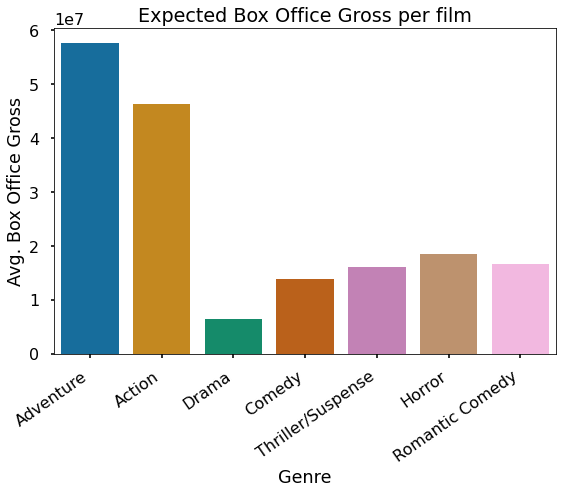

In [52]:
x = genres_df['Genre'].head(7)
y = genres_df['Avg_movie_Total_boxoffice'].head(7)
plt.figure(figsize=(9,6))
ax = sns.barplot(x=x, y=y)
plt.xticks(rotation=35, horizontalalignment='right')
plt.xlabel('Genre')
plt.ylabel('Avg. Box Office Gross')
plt.title('Expected Box Office Gross per film')

Text(0.5, 1.0, 'Total Movies By Genre')

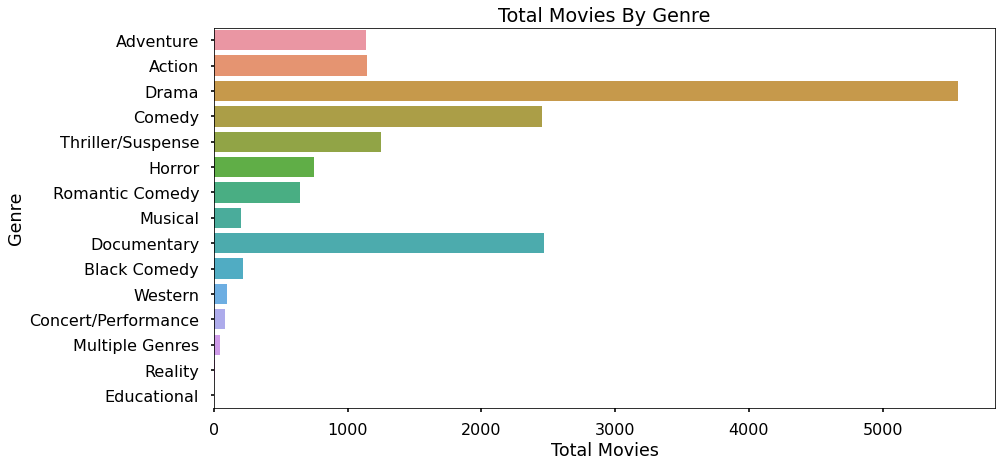

In [3]:
x = genres_df['Movies']
y = genres_df['Genre']

plt.figure(figsize=(14,7))
ax3 = sns.barplot(x=x, y=y,)
plt.xlabel('Total Movies')
plt.ylabel('Genre')
plt.title('Total Movies By Genre')

Text(0.5, 1.0, 'Top Grossing Genres')

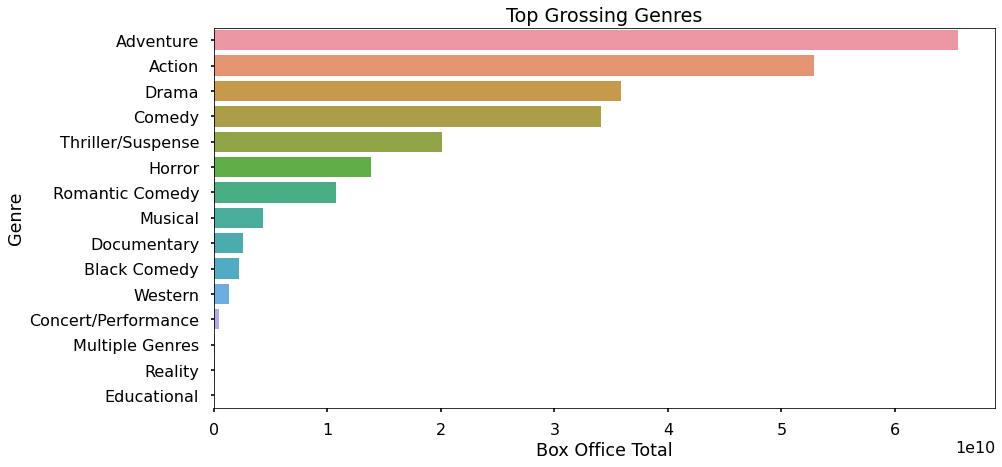

In [46]:
x = genres_df['TotalBoxOffice']
y = genres_df['Genre']

plt.figure(figsize=(14,7))
ax3 = sns.barplot(x=x, y=y,)
plt.xlabel('Box Office Total')
plt.ylabel('Genre')
plt.title('Top Grossing Genres')

In [ ]:
x = genres_df['TotalBoxOffice'].groupby(genres_df['Genre'])
y = genres_df['Total']

plt.figure(figsize=(14,7))
ax3 = sns.barplot(x=x, y=y,)
plt.xlabel('Total Movies')
plt.ylabel('Genre')
plt.title('Total Movies By Genre')

In [17]:
movie_studio = pd.read_csv('zippedData/Distributors_movie_breakdown_95to22.csv')
# movie_studio = movie_studio.drop(['Unnamed: 5', 'Unnamed: 6', "Unnamed: 7", 'Unnamed: 8'], axis=1)
movie_studio['Share'] = list(map(lambda x: x[:-1], movie_studio['Share'].values))
movie_studio['Share'] = [float(x) for x in movie_studio['Share'].values]
movie_studio = movie_studio.head(6)
movie_studio.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Movie Studio    6 non-null      object 
 1   Movies          6 non-null      int64  
 2   TotalBoxOffice  6 non-null      float64
 3   Tickets         6 non-null      object 
 4   Share           6 non-null      float64
dtypes: float64(2), int64(1), object(2)
memory usage: 368.0+ bytes


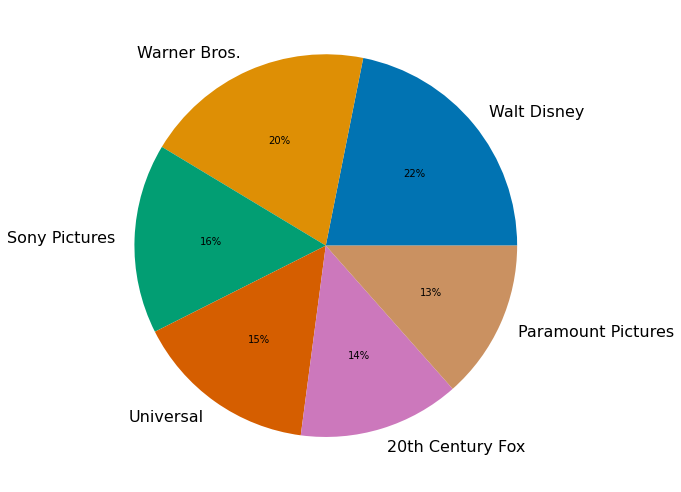

In [18]:
# declaring data
x = movie_studio['Share']
y = movie_studio['Movie Studio']
  
  
# plotting data on chart
plt.pie(x, labels=y, autopct='%.0f%%')
  
# displaying chart
plt.show()